# RETAIL SALES ANALYSIS

In [1]:
import pandas as pd

# Importing Data

In [2]:
retail=pd.read_csv('retail_sales_dataset.csv')

In [3]:
retail

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


##### - There are 1000 distinct transactions in the retail store

## Data Inspection

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
retail.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


##### - The average customer age in this retail store is 41.4 and the oldest customer is 64 years old.
##### - The average price per unit of the items in the store is 179.9 and the priciest item is 500 
##### - The average quantity of items the customers purchase at the store is 2.5 (roughly 3 items)

In [6]:
retail.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
retail.tail(2)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [8]:
#Dimensions of the data
retail.shape

(1000, 9)

In [9]:
#Checking the datatypes
retail.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [10]:
# Importing necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
# Let's check if there are missing values in this data, and fix it if any
retail.isnull()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [12]:
#Checking the percentage of null values in each column
retail.isna().sum()/len(retail)*100

Transaction ID      0.0
Date                0.0
Customer ID         0.0
Gender              0.0
Age                 0.0
Product Category    0.0
Quantity            0.0
Price per Unit      0.0
Total Amount        0.0
dtype: float64

<Axes: >

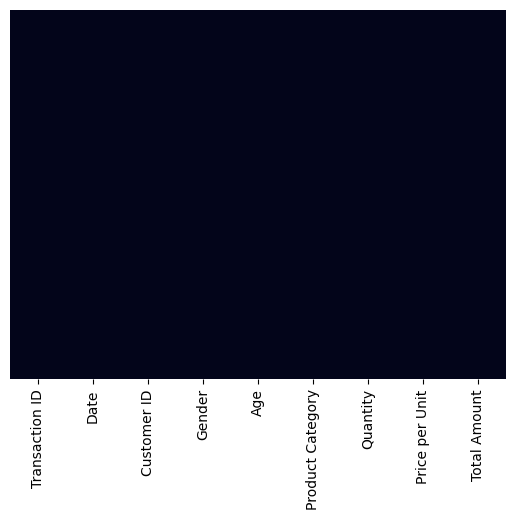

In [13]:
# visual of missing data
sns.heatmap(retail.isnull(),yticklabels=False, cbar=False)

##### - We do not have any missing values in the data

In [14]:
#are there duplicated values in the data?
retail.duplicated().sum()

0

##### - No duplicated values in the data

## ANALYSIS

In [15]:
# Setting visualization aesthetics
sns.set(style="whitegrid")

# Objective 4: Customer and Product Analysis

# Analyze Customer Demographics - Gender Distribution
gender_counts = retail['Gender'].value_counts()

# Age Distribution Analysis
age_distribution = retail['Age'].describe()

# Analyze Purchasing Behavior - Product Category and Spend per Category
category_sales = retail.groupby('Product Category')['Total Amount'].sum()
category_quantity = retail.groupby('Product Category')['Quantity'].sum()

# Display the summary statistics
gender_counts, age_distribution, category_sales, category_quantity


(Gender
 Female    510
 Male      490
 Name: count, dtype: int64,
 count    1000.00000
 mean       41.39200
 std        13.68143
 min        18.00000
 25%        29.00000
 50%        42.00000
 75%        53.00000
 max        64.00000
 Name: Age, dtype: float64,
 Product Category
 Beauty         143515
 Clothing       155580
 Electronics    156905
 Name: Total Amount, dtype: int64,
 Product Category
 Beauty         771
 Clothing       894
 Electronics    849
 Name: Quantity, dtype: int64)

##### Gender Distribution: The dataset has a near-even split with 510 female and 490 male customers.

##### Age Distribution:

##### Mean age: 41 years
##### Age range: 18 to 64 years
##### Middle 50% of customers are between 29 and 53 years old, indicating a primarily adult customer base.
##### Product Category Sales and Quantities:

##### Beauty: Total sales of 143,515, with 771 items sold.
##### Clothing: Total sales of 155,580, with 894 items sold.
##### Electronics: Total sales of 156,905, with 849 items sold.

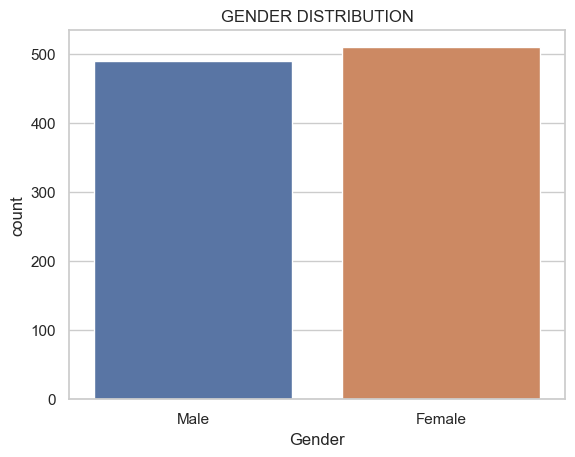

In [16]:
#what is the gender distribution overally?
sns.countplot(x='Gender',data=retail)
plt.title('GENDER DISTRIBUTION')
plt.show()

##### - The retail store has more female transacting customers to their male counterparts
##### - We can see that female customers are narrowly above 500 in number
##### - Male customers are less than 500 in number

C:\Users\ADMIN\Downloads\Apps and setup\SONEK DATA SCHOOL SOFTWARES\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


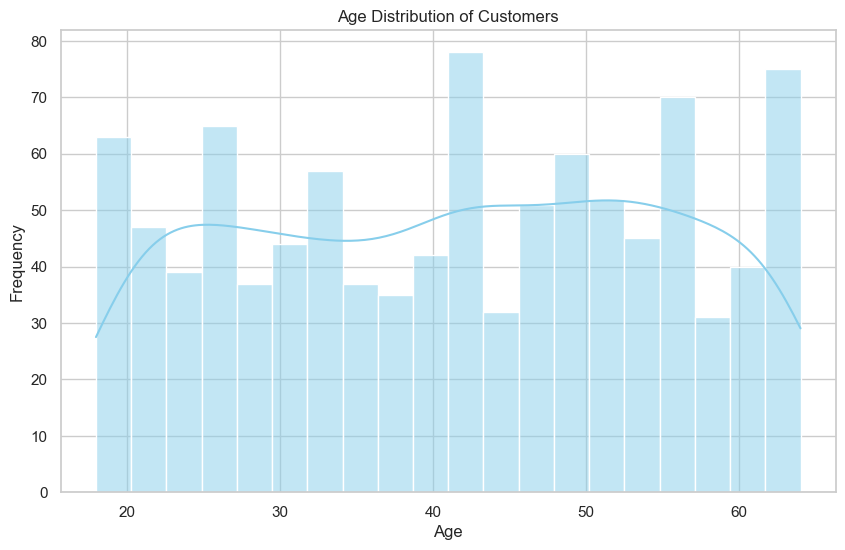

In [17]:
#what is the age distribution overally?
# Plot 2: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(retail['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### Age Distribution: A broad age range exists, with a significant portion of customers between ages 29 and 53. This range could represent the primary market for these products.

C:\Users\ADMIN\Downloads\Apps and setup\SONEK DATA SCHOOL SOFTWARES\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


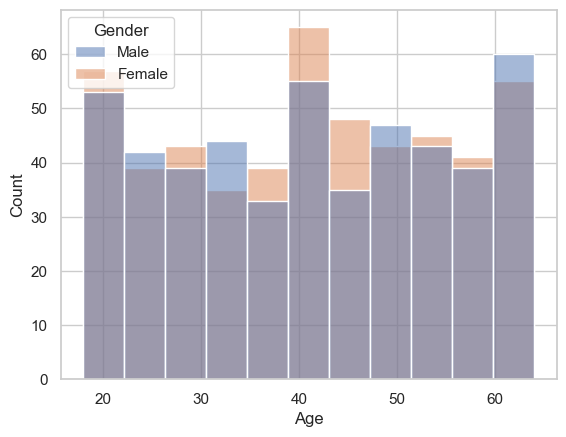

In [18]:
#WHat is the gender distribution of different age groups
## Plot 3
sns.histplot(x='Age', data=retail, hue='Gender');
plt.show()

##### - we have that the male population are only more when in the ages of 60, 50, between 30-35, and above 20 but not more than 25 years of age

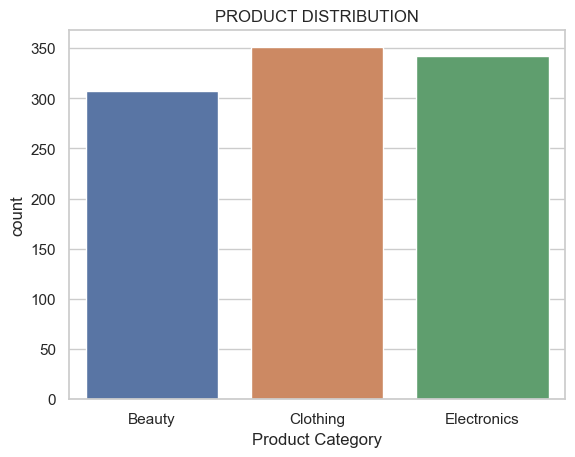

In [19]:
#what product do the customers come in for more?
# plot 4
sns.countplot(x='Product Category',data=retail)
plt.title('PRODUCT DISTRIBUTION')
plt.show()

##### - The clothing category edges the other category as the most popular category accounting to about 350 transaction instances
##### -Electronics is a close second and Beauty category is the least sought after of the three

### RECOMMENDATION: 
##### 1. Provide a wider range of fashion and clothing brands and trends
##### 2. Put in a free sample offer for Beauty products to drive their sales up provided they satisfy the customers
##### 3. Put in sale offer innitiatives for the products e.g. buy one get one free, or discounts for example: cash discount, quantity discounts etc.

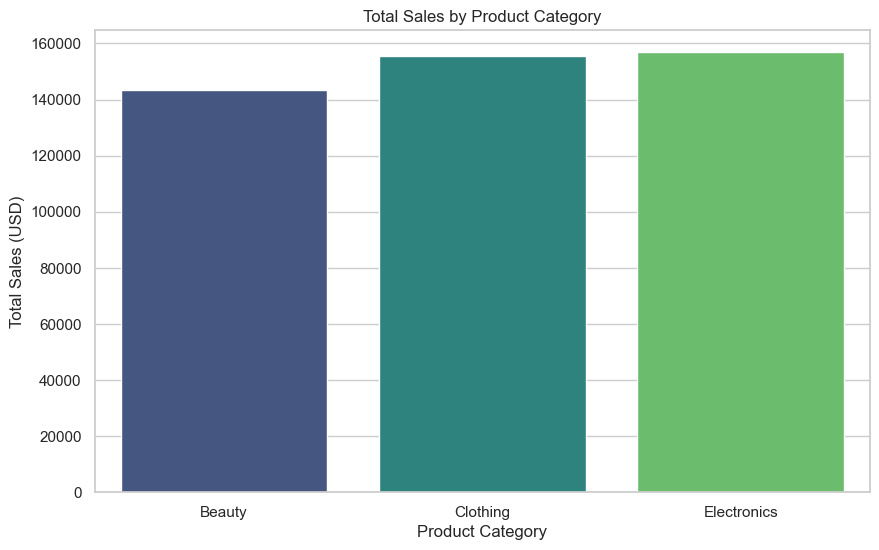

In [20]:
# Plot 5: Total Sales by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (USD)')
plt.show()

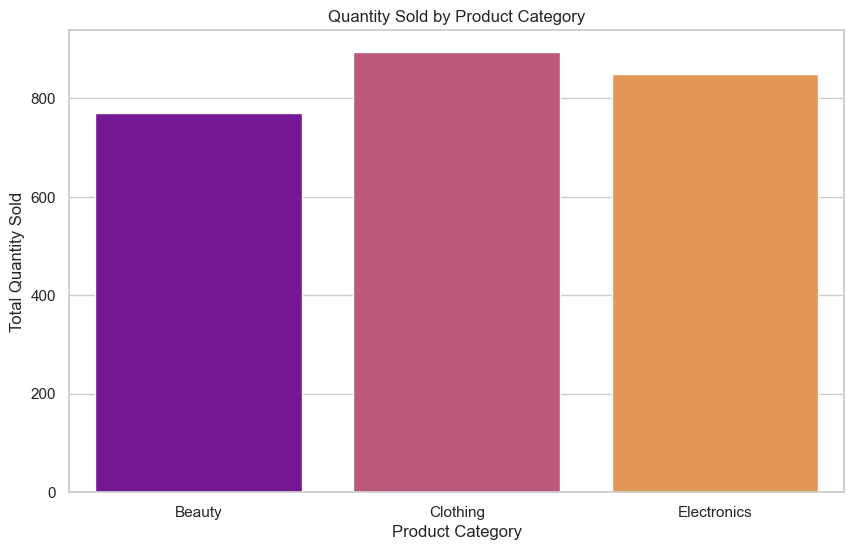

In [21]:
# Plot 6: Quantity Sold by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_quantity.index, y=category_quantity.values, palette='plasma')
plt.title('Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.show()

##### Total Sales and Quantity by Product Category:
##### - Electronics leads in total sales but has a moderate quantity sold, suggesting higher-priced items.
##### - Clothing has slightly lower total sales but the highest quantity sold, indicating lower-priced items.
##### - Beauty products show consistent sales and quantities, likely due to recurring, lower-cost purchases.

#### Recommendations:
##### Product-Specific Marketing:

##### - Use targeted promotions for Electronics among customers aged 30-50, who may be more likely to make high-value purchases.
##### - Encourage repeat purchases of Beauty products through loyalty programs, given their lower price point and repeat demand.
##### Gender-Specific Campaigns:

##### - Since the gender split is nearly even, campaigns can be tailored to different demographics without heavy gender-based segmentation.
##### Age-Targeted Promotions:

##### - Focus marketing efforts on the 29-53 age group, as they are most represented. Promotions highlighting quality and durability could appeal to this group’s preferences.

## Time Series Analysis

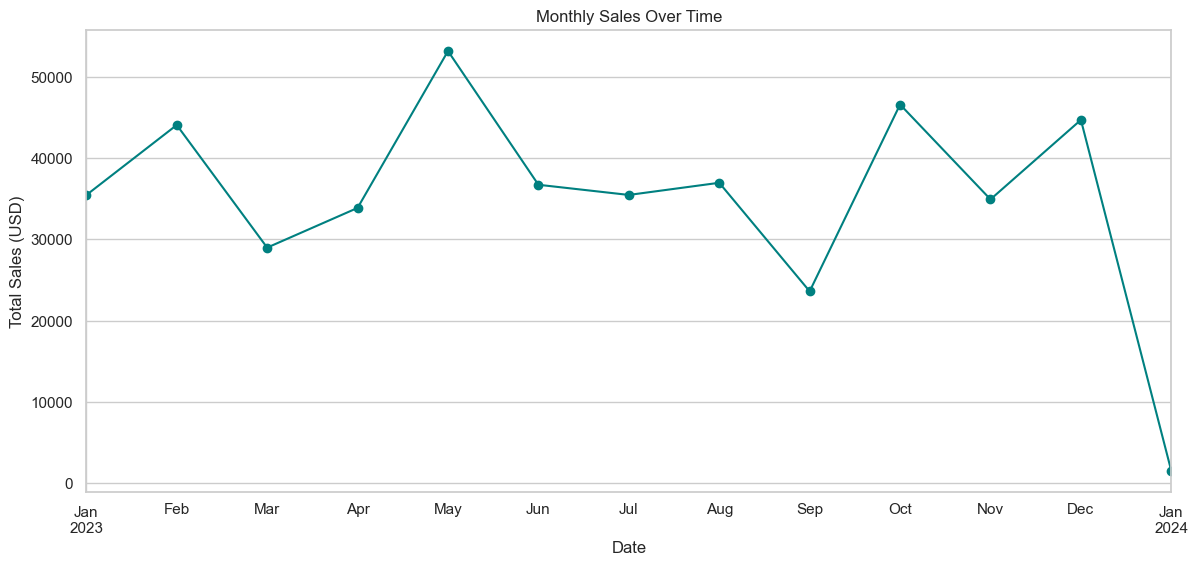

In [22]:
# Converting Date column to datetime format
retail['Date'] = pd.to_datetime(retail['Date'])

# Setting Date as index for easier time-based analysis
retail.set_index('Date', inplace=True)

# Resampling data by month to get monthly total sales
monthly_sales = retail['Total Amount'].resample('M').sum()

# Plotting the time series of monthly sales
plt.figure(figsize=(14, 6))
monthly_sales.plot(color='teal', marker='o', linestyle='-')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.show()


##### Most sales are realized in the month of May
##### This was not expected since we would think that most people would opt to purchase more in the festive months like December